In [108]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
import yfinance as yf

In [118]:
from fredapi import Fred

In [45]:
ticker_symbol = '^GSPC'

sp500_data = yf.download(ticker_symbol, start = '1956-01-01', end = '2023-12-31')
sp500_data.columns

[*********************100%%**********************]  1 of 1 completed


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [95]:
sp500_data['Adj Close'] = sp500_data['Adj Close'].astype('float32')
yearly_data = sp500_data['Adj Close'].resample('Y').last()
isinstance(yearly_data, pd.Series)
sp500_df = pd.DataFrame(yearly_data)
sp500_df

,Adj Close
Date,
1956-12-31,46.669998
1957-12-31,39.990002
1958-12-31,55.209999
1959-12-31,59.889999
1960-12-31,58.110001
...,...
2019-12-31,3230.780029
2020-12-31,3756.070068
2021-12-31,4766.180176


In [102]:
sp500_df["CAGR"] = sp500_df['Adj Close']/(sp500_df['Adj Close'].shift(1)) - 1

sp500_df['President'] = ''

sp500_df.loc[sp500_df.index < dt.datetime(1961, 1, 20), 'President'] = 'Dwight_Eisenhower_R'
sp500_df.loc[(sp500_df.index >= dt.datetime(1961, 1, 20)) & (sp500_df.index < dt.datetime(1963, 11, 22)), 'President'] = 'John_Kennedy_D'
sp500_df.loc[(sp500_df.index >= dt.datetime(1963, 11, 22)) & (sp500_df.index < dt.datetime(1969, 1, 20)), 'President'] = 'Lyndon_Johnson_D'
sp500_df.loc[(sp500_df.index >= dt.datetime(1969, 1, 20)) & (sp500_df.index < dt.datetime(1974, 8, 9)), 'President'] = 'Richard_Nixon_R'
sp500_df.loc[(sp500_df.index >= dt.datetime(1974, 8, 9)) & (sp500_df.index < dt.datetime(1977, 1, 20)), 'President'] = 'Gerald_Ford_R'
sp500_df.loc[(sp500_df.index >= dt.datetime(1977, 1, 20)) & (sp500_df.index < dt.datetime(1981, 1, 20)), 'President'] = 'Jimmy_Carter_D'
sp500_df.loc[(sp500_df.index >= dt.datetime(1981, 1, 20)) & (sp500_df.index < dt.datetime(1989, 1, 20)), 'President'] = 'Ronald_Reagan_R'
sp500_df.loc[(sp500_df.index >= dt.datetime(1989, 1, 20)) & (sp500_df.index < dt.datetime(1993, 1, 20)), 'President'] = 'George_Bush_R'
sp500_df.loc[(sp500_df.index >= dt.datetime(1993, 1, 20)) & (sp500_df.index < dt.datetime(2001, 1, 20)), 'President'] = 'Bill_Clinton_D'
sp500_df.loc[(sp500_df.index >= dt.datetime(2001, 1, 20)) & (sp500_df.index < dt.datetime(2009, 1, 20)), 'President'] = 'George_W._Bush_R'
sp500_df.loc[(sp500_df.index >= dt.datetime(2009, 1, 20)) & (sp500_df.index < dt.datetime(2017, 1, 20)), 'President'] = 'Barack_Obama_D'
sp500_df.loc[(sp500_df.index >= dt.datetime(2017, 1, 20)) & (sp500_df.index < dt.datetime(2021, 1, 20)), 'President'] = 'Donald_Trump_R'
sp500_df.loc[(sp500_df.index >= dt.datetime(2021, 1, 20)) & (sp500_df.index < dt.datetime(2024, 1, 20)), 'President'] = 'Joe_Biden_D'

sp500_df['Political_Party'] = sp500_df['President'].str[-1]

sp500_df

,Adj Close,CAGR,President,Political_Party
Date,,,,
1956-12-31,46.669998,NaN,Dwight_Eisenhower_R,R
1957-12-31,39.990002,-0.143133,Dwight_Eisenhower_R,R
1958-12-31,55.209999,0.380595,Dwight_Eisenhower_R,R
1959-12-31,59.889999,0.084767,Dwight_Eisenhower_R,R
1960-12-31,58.110001,-0.029721,Dwight_Eisenhower_R,R
...,...,...,...,...
2019-12-31,3230.780029,0.288781,Donald_Trump_R,R
2020-12-31,3756.070068,0.162589,Donald_Trump_R,R
2021-12-31,4766.180176,0.268927,Joe_Biden_D,D


In [113]:
df1 = sp500_df.groupby(['President'])['CAGR'].mean().reset_index()
df1 = df1.sort_values(by = 'CAGR')
df1

,President,CAGR
5,George_W._Bush_R,-0.024213
11,Richard_Nixon_R,-0.004418
9,John_Kennedy_D,0.056593
7,Jimmy_Carter_D,0.069106
6,Gerald_Ford_R,0.069931
3,Dwight_Eisenhower_R,0.073127
10,Lyndon_Johnson_D,0.092640
12,Ronald_Reagan_R,0.098856
8,Joe_Biden_D,0.105601
0,Barack_Obama_D,0.124300


In [98]:
print(df1.head())

President
George_W._Bush_R   -0.024213
Richard_Nixon_R    -0.004418
John_Kennedy_D      0.056593
Jimmy_Carter_D      0.069106
Gerald_Ford_R       0.069931
Name: CAGR, dtype: float32


<Figure size 1200x600 with 0 Axes>

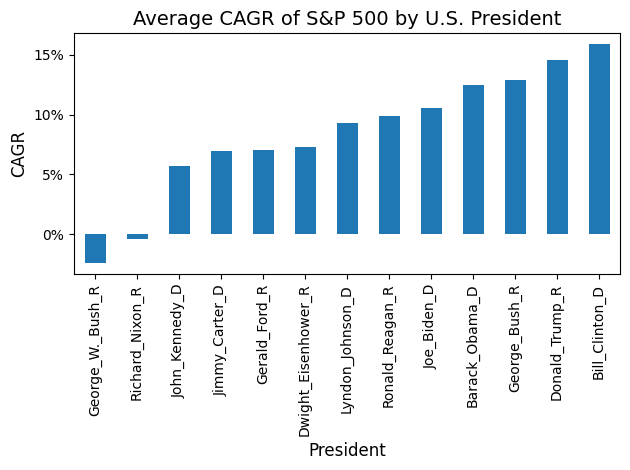

In [114]:

plt.figure(figsize = (12, 6))
ax = df1.plot(kind = 'bar', x = 'President', y = 'CAGR', legend = False)

ax.set_xticklabels(df1['President'], rotation = 90)

ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

ax.set_xlabel('President', fontsize=12)
ax.set_ylabel('CAGR', fontsize=12)
ax.set_title('Average CAGR of S&P 500 by U.S. President', fontsize=14)

ax.tick_params(axis='x', labelsize=10)
ax.set_xticks(range(len(df1['President'])))

plt.tight_layout()

In [115]:
sp500_df.groupby(['President'])['CAGR'].median().reset_index()

,President,CAGR
0,Barack_Obama_D,0.120867
1,Bill_Clinton_D,0.198949
2,Donald_Trump_R,0.178394
3,Dwight_Eisenhower_R,0.027523
4,George_Bush_R,0.153855
5,George_W._Bush_R,0.032653
6,Gerald_Ford_R,0.191485
7,Jimmy_Carter_D,0.066854
8,Joe_Biden_D,0.242305
9,John_Kennedy_D,0.056593


In [116]:
sp500_df.groupby(['Political_Party'])['CAGR'].median().reset_index()

,Political_Party,CAGR
0,D,0.127827
1,R,0.087351


In [117]:
sp500_df.groupby(['Political_Party'])['CAGR'].mean().reset_index()

,Political_Party,CAGR
0,D,0.113748
1,R,0.060421


In [ ]:
Dwight_Eisenhower = 1957-1961
John_Kennedy = 1961-1963
Lyndon_Johnson = 1963-1969
Richard_Nixon = 1969-1974
Gerald_Ford = 1974-1977
Jimmy_Carter = 1977-1981
Ronald_Reagan = 1981-1989
George_Bush = 1989-1993
Bill_Clinton = 1993-2001
George_W_Bush = 2001-2009
Barack_Obama = 2009-2017
Donald_Trump = 2017-2021
Joe_Biden = 2021-Present

<Axes: >

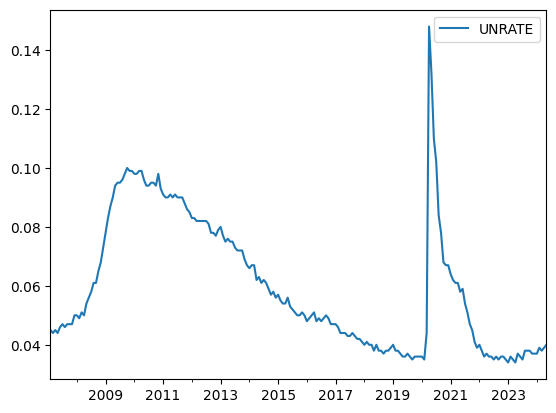

In [148]:
fred_key = "258743ce08c237c03fc140e3b15e1b41"
fred = Fred(api_key = fred_key)
unemployment_rate = fred.get_series('UNRATE')

unrate_df = pd.DataFrame({'UNRATE': unemployment_rate})
unrate_df['UNRATE'] = unrate_df['UNRATE']/100
unrate_df = unrate_df.loc[(unrate_df.index > dt.datetime(2007, 1, 1)) & (unrate_df.index <= dt.datetime(2024, 5, 31)), ['UNRATE']]
unrate_df.plot()

In [163]:
def format_data_from_fred(data_series, column_name):
    df = pd.DataFrame({column_name: data_series})
    df[column_name] = df[column_name]/100
    df = df.loc[(df.index > dt.datetime(2007, 1, 1)) & (df.index <= dt.datetime(2024, 5, 31)), [column_name]]

    return df
    

In [164]:
unrate_df02 = format_data_from_fred(unemployment_rate, 'UNRATE')
unrate_df02

,UNRATE
2007-02-01,0.045
2007-03-01,0.044
2007-04-01,0.045
2007-05-01,0.044
2007-06-01,0.046
...,...
2024-01-01,0.037
2024-02-01,0.039
2024-03-01,0.038
2024-04-01,0.039


In [153]:

min = unrate_df.loc[(unrate_df.index > dt.datetime(2017, 1, 1)) & (unrate_df.index <= dt.datetime(2021, 5, 31)), 'UNRATE'].min()
max = unrate_df.loc[(unrate_df.index > dt.datetime(2017, 1, 1)) & (unrate_df.index <= dt.datetime(2020, 1, 31)), 'UNRATE'].max()

print(min, max)

0.035 0.046


In [150]:
unrate_df.tail()

,UNRATE
2024-01-01,0.037
2024-02-01,0.039
2024-03-01,0.038
2024-04-01,0.039
2024-05-01,0.040


In [158]:
real_gdp_gr = fred.get_series('A191RL1Q225SBEA')

In [159]:
real_gdp_gr

1947-04-01   -1.0
1947-07-01   -0.8
1947-10-01    6.4
1948-01-01    6.2
1948-04-01    6.8
             ... 
2023-01-01    2.2
2023-04-01    2.1
2023-07-01    4.9
2023-10-01    3.4
2024-01-01    1.3
Length: 308, dtype: float64

In [165]:
real_gdp_df02 = format_data_from_fred(real_gdp_gr, 'Real_GDP_Growth_Rate')
real_gdp_df02

,Real_GDP_Growth_Rate
2007-04-01,0.025
2007-07-01,0.023
2007-10-01,0.025
2008-01-01,-0.017
2008-04-01,0.024
...,...
2023-01-01,0.022
2023-04-01,0.021
2023-07-01,0.049
2023-10-01,0.034


<Axes: >

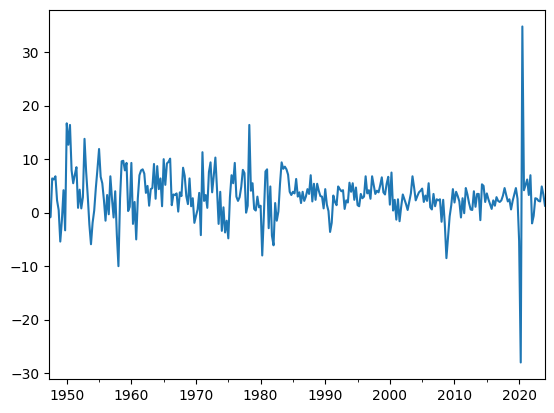

In [156]:
real_gdp_gr = pd.DataFrame({'Real_GDP_Growth_Rate': real_gdp_gr})
unrate_df['UNRATE'] = real_gdp_gr['Real_GDP_Growth_Rate']/100
unrate_df = unrate_df.loc[(unrate_df.index > dt.datetime(2007, 1, 1)) & (unrate_df.index <= dt.datetime(2024, 5, 31)), ['UNRATE']]
unrate_df.plot()